In [1]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import random
import dataframe_image as dfi
from PIL import Image
import os
import six
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
import json
import collections
from pandas.plotting import table


In [2]:
#18908700789545           esse tem 6 Restart

In [3]:
#Deletar valores iguais de uma deteminada coluna(subset)  e manter a primeira ocorrência
def del_same_values_colum(df, name_colum):
    df = df.drop_duplicates(subset=['ID'], keep='first')
    return df

In [4]:
#Função 
def count_proce (df_grupo, df_djson):
    df_grupo = df_grupo [['ID']]
    df_grupo = df_grupo.rename(columns={'ID': 'visit_id'})
    new_df = df_grupo.merge(df_djson, on='visit_id', how='left').drop_duplicates()
    print(new_df)
    count =0 
    #Agora buscar as contagens
    arr = []
    arr_t=[]

    lista_proce = []
    for i, row in new_df.iterrows():
        obj = json.loads(row['internacao_json'])
        string_concept = ''
        #arr_t.append(obj['visit_concept_name'])
        string_concept+=obj['visit_concept_name']+'&'
        if(obj['procedimentos'] != None):
            for procedure_name in obj['procedimentos']:
                nome_do_procedimento = str(procedure_name['procedure_ocurrence_concept_name'])
                string_concept += nome_do_procedimento + "&"
                arr_t.append(nome_do_procedimento)
        else:
            print('')
            
        arr.append(string_concept)
        
        
        
        
    c = collections.Counter(arr_t)
    df_final_show = pd.DataFrame.from_dict(c, orient='index').reset_index()
    df_final_show = df_final_show.rename(columns={'index':'nome_pro', 0:'contagem'})
    
    
    
    
    
    


    return  df_final_show    

In [5]:
#Reading file provide SQL
def read_csv(name_df,path):
    name_df = pd.read_csv(path+".csv")
    return name_df

In [6]:
df_json = pd.read_csv("file_json.csv")

In [7]:
df_labels= pd.read_csv("data_kf5.csv")

In [8]:
df_labels

,Nome Ocorrencia,Labels,ID,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,...,urina_tipo_i,urocultura_,valvo_pulmonar,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12,western_blott_para_hiv
0,Miocardiopatia isquemica,374,1152470766391025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Taquicardia ventricular,373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hipertensao essencial (primaria),373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bloqueio atrioventricular total,373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Diabetes mellitus nao-insulino-dependente,373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,Febre nao especificada,0,3597757495322061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10286,"Tuberculose pulmonar, sem mencao de confirmaca...",0,3597757495322061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10287,Endocardite infecciosa aguda e subaguda,0,7112936781531426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10288,Endocardite aguda nao especificada,0,7112936781531426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_labels =df_labels.drop_duplicates()

In [10]:
lista_proteste = df_labels['Labels'].value_counts()

In [22]:
lista_proteste

5      960
7      480
45     274
332    231
23     223
      ... 
111      1
139      1
163      1
187      1
191      1
Name: Labels, Length: 375, dtype: int64

In [11]:
lista_proteste.index

Int64Index([  5,   7,  45, 332,  23,   9,   6,  62,  80, 134,
            ...
            153,  95, 195,  93, 270, 111, 139, 163, 187, 191],
           dtype='int64', length=375)

In [12]:
lista = list(lista_proteste.index)

In [23]:
lista_df = []

In [27]:
lista[0:5]

[5, 7, 45, 332, 23]

             visit_id         person_id  \
0    8239351789191648  7370754100534908   
1    8826999234830334  4330880383768873   
3    8834334730138666  4340156972279083   
4    7892318516587601   387727122751853   
5    7896943814982119  1758414134510267   
..                ...               ...   
955  3794030512143826  1488106089511798   
956  3929458952105542  6642891071026008   
957  3895406662514358  5130165091806862   
958  3775050068820099  3848710987560534   
959  3789647633340070  5201238795183186   

                                       internacao_json  internacao_str  
0    {"person_id":7370754100534908,"visit_occurrenc...             NaN  
1    {"person_id":4330880383768873,"visit_occurrenc...             NaN  
3    {"person_id":4340156972279083,"visit_occurrenc...             NaN  
4    {"person_id":387727122751853,"visit_occurrence...             NaN  
5    {"person_id":1758414134510267,"visit_occurrenc...             NaN  
..                                           

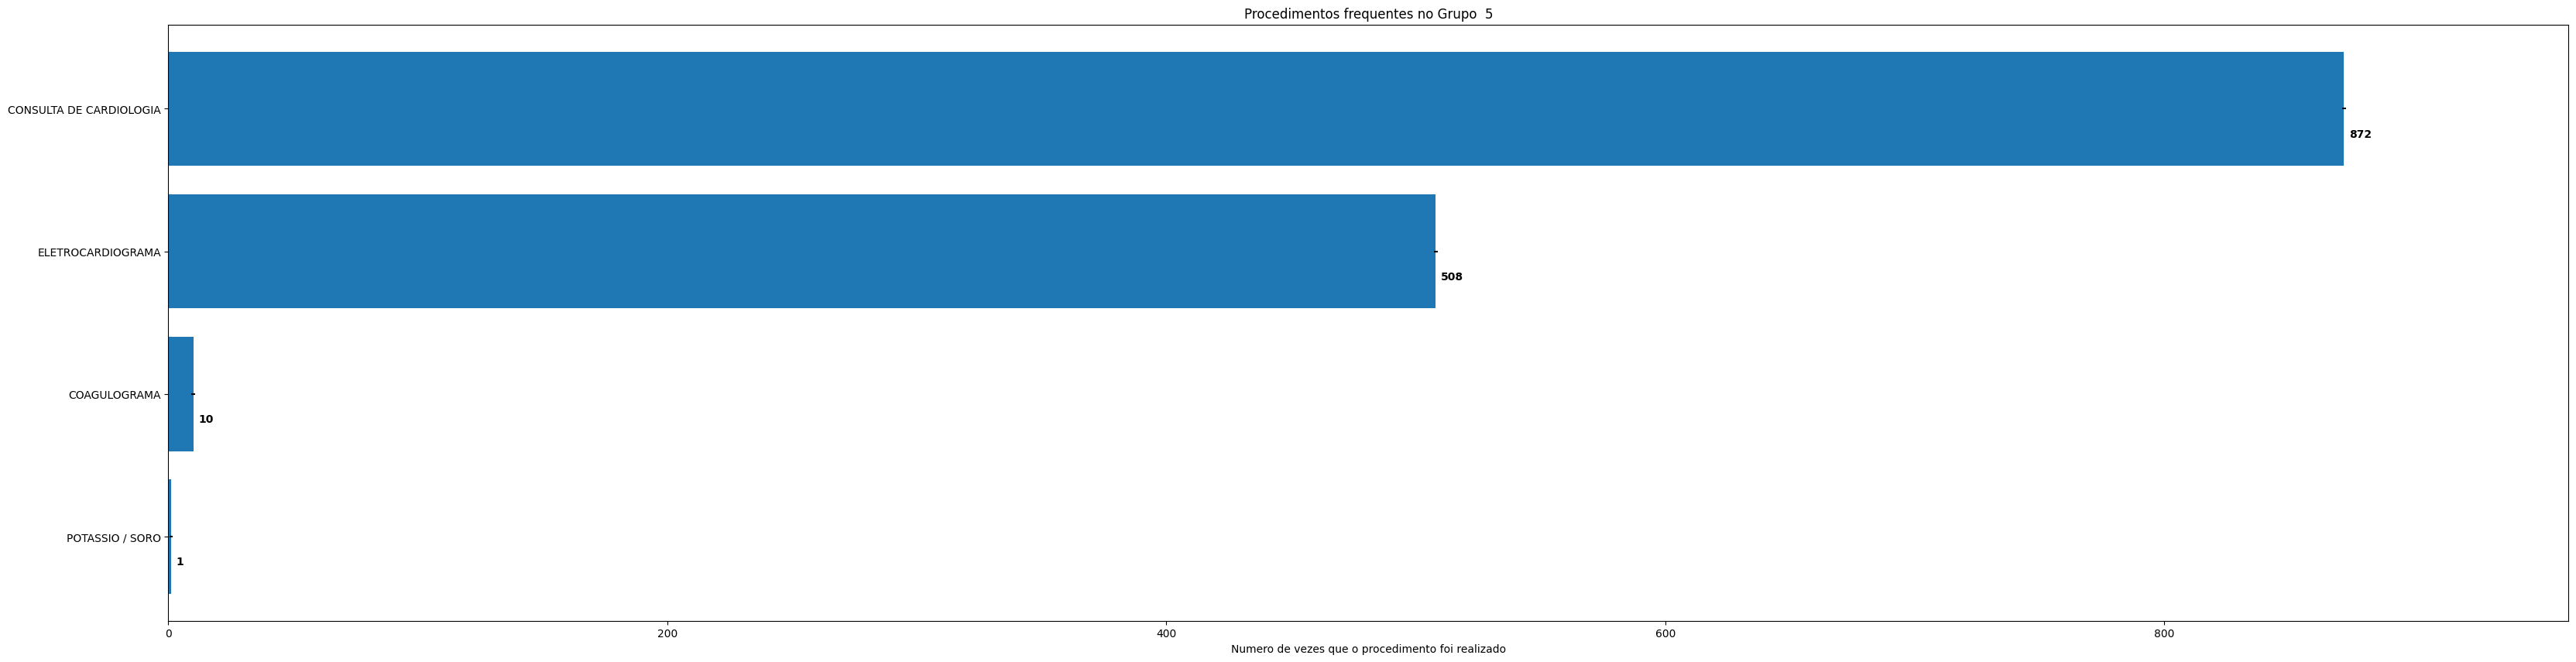

             visit_id         person_id  \
0    2511697622605499  5957995841710962   
5      18908700789545  3121459871827416   
11   8233604379741284  8133476935743580   
12   2485180407428599  5453963724261656   
18   3436195343843051  5193989014213341   
..                ...               ...   
475  7897820369402538  7256929299205580   
476  6468329100840436  4209393595691323   
477  6484402452832142   262137627772924   
479  6437590966868654  4503742227862157   
482  1049445853487930  8632967371406946   

                                       internacao_json  internacao_str  
0    {"person_id":5957995841710962,"visit_occurrenc...             NaN  
5    {"person_id":3121459871827416,"visit_occurrenc...             NaN  
11   {"person_id":8133476935743580,"visit_occurrenc...             NaN  
12   {"person_id":5453963724261656,"visit_occurrenc...             NaN  
18   {"person_id":5193989014213341,"visit_occurrenc...             NaN  
..                                           

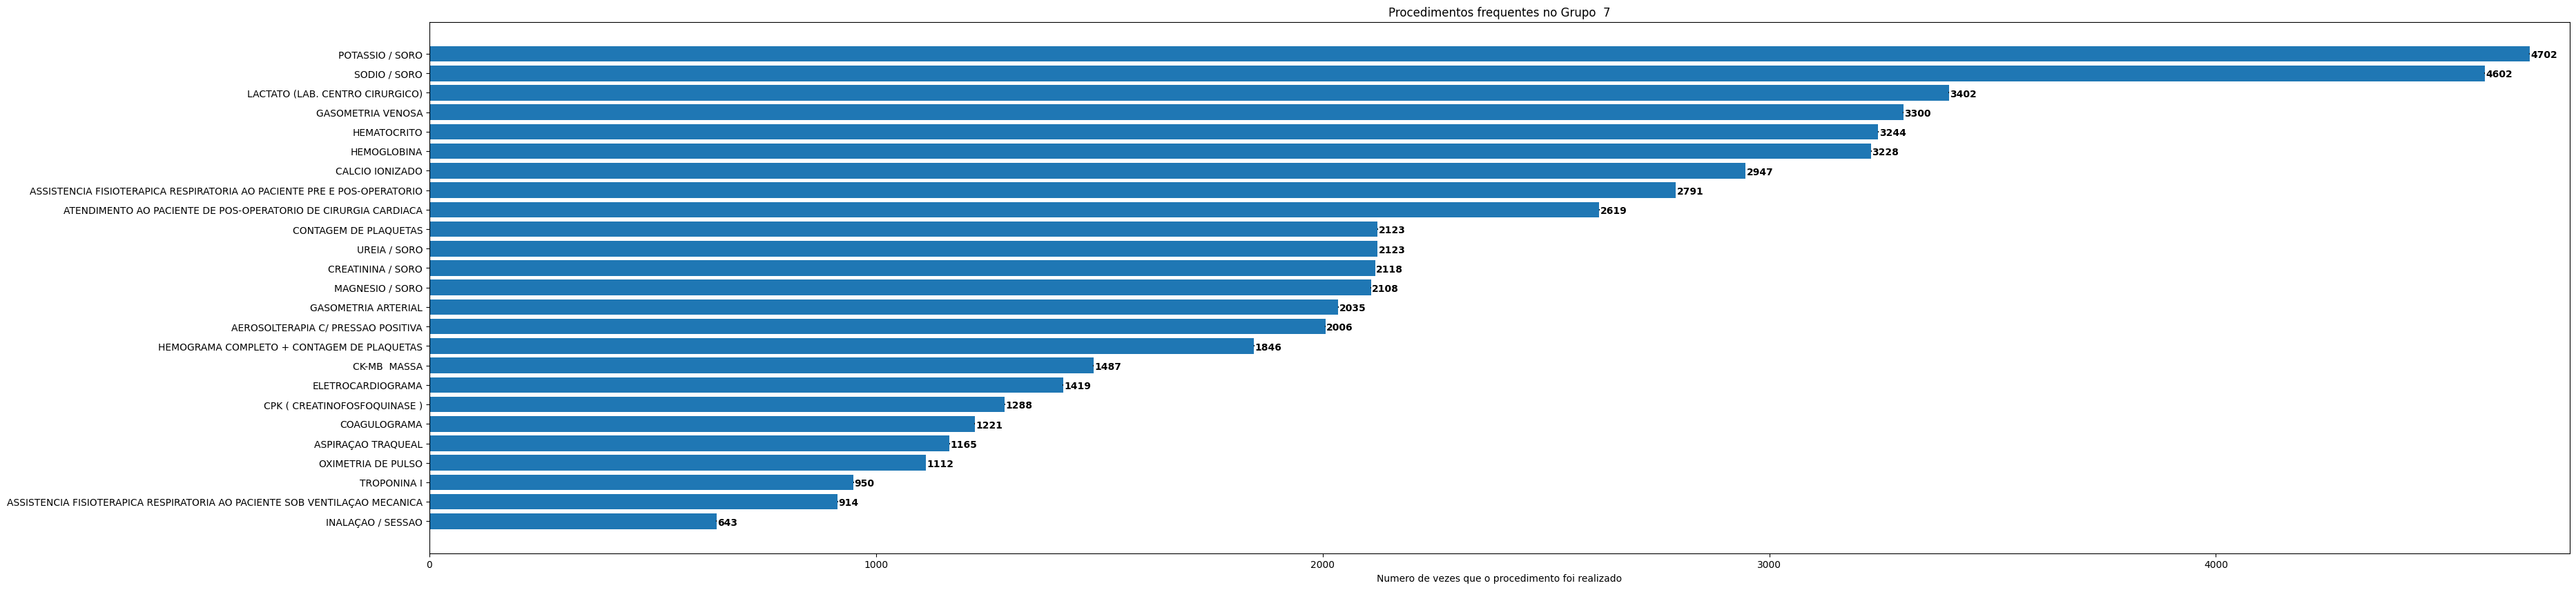

             visit_id         person_id  \
0    6647891932814645    11222339700893   
1    3002251163332205  1821304999509722   
2    7902322729240490  2094777997233496   
3    2954538895359508  3074907872221742   
4    6643779652652261  4150705024832747   
..                ...               ...   
269   151015070234995  2001916794946355   
270   173484277877759  8653119763055521   
271   139031277875509  6589241424497224   
272  2774847026216882  6785282808431835   
273   112311033335822  7166322471669212   

                                       internacao_json  internacao_str  
0    {"person_id":11222339700893,"visit_occurrence_...             NaN  
1    {"person_id":1821304999509722,"visit_occurrenc...             NaN  
2    {"person_id":2094777997233496,"visit_occurrenc...             NaN  
3    {"person_id":3074907872221742,"visit_occurrenc...             NaN  
4    {"person_id":4150705024832747,"visit_occurrenc...             NaN  
..                                           

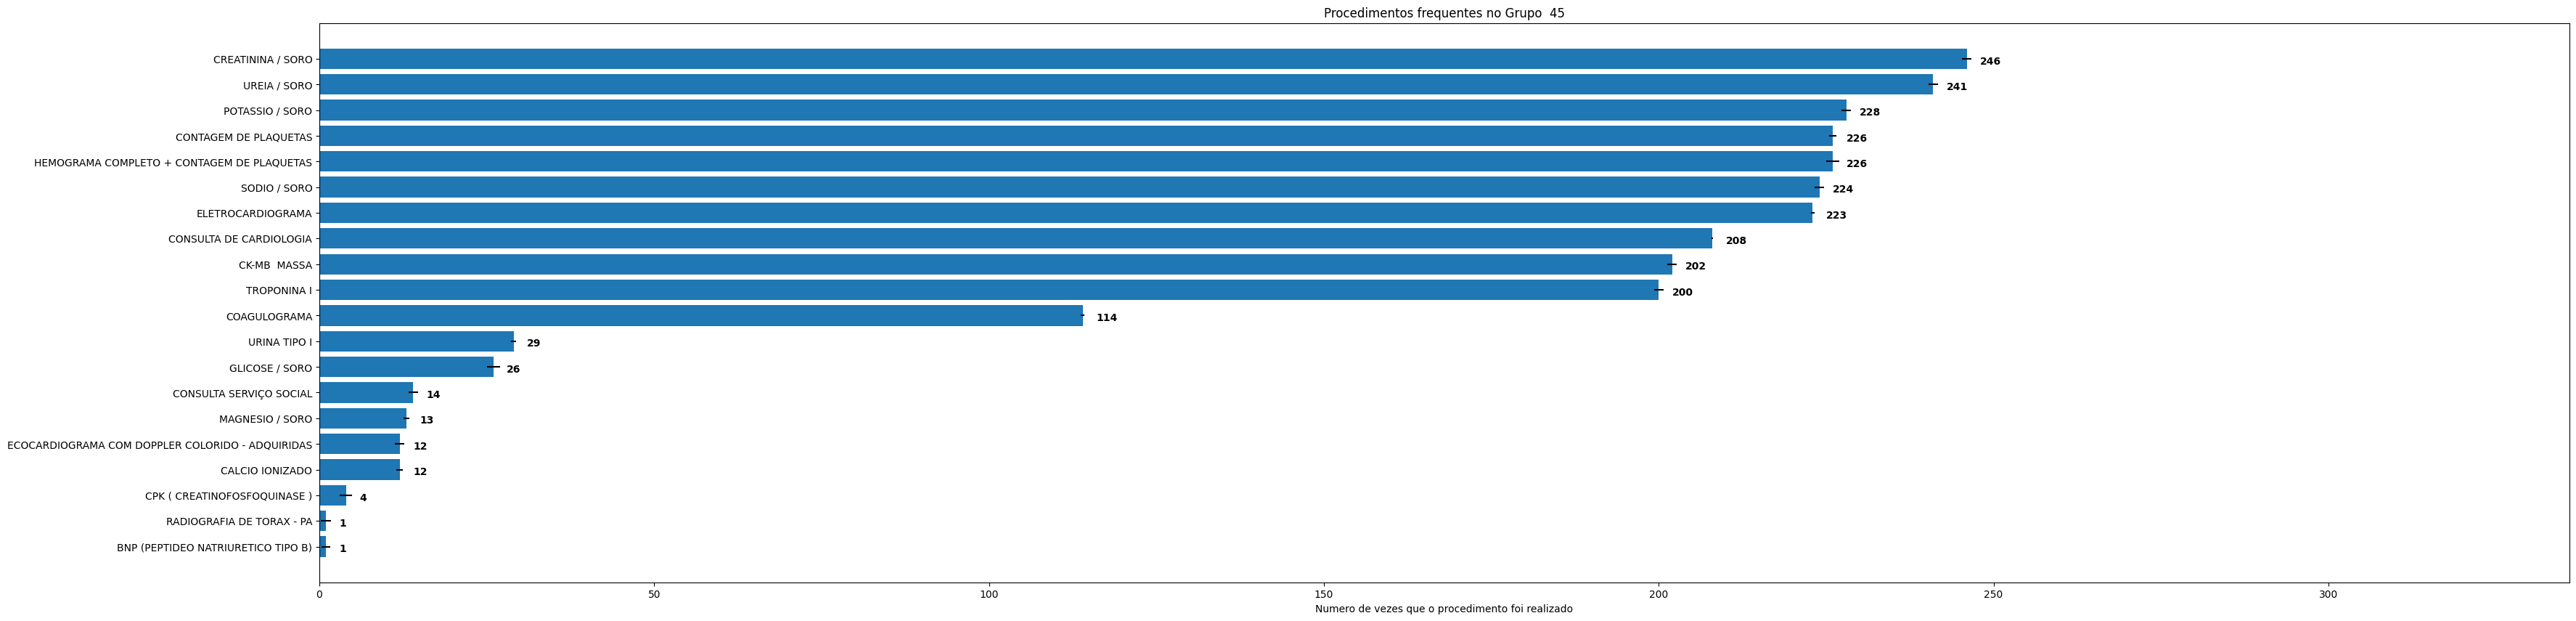

             visit_id         person_id  \
0    1781806355026044   389591449496502   
1    6874578205790927  2375815898404427   
2    4299500929134967  2629107959764622   
3    2108620843938833  7393467620607343   
4    2104666705421082   822823699109664   
..                ...               ...   
226  2435105388364396  5991238052707704   
227   221147099258476  3830827594252002   
228  3472153475434505  5401321755879121   
229   763288368391981  3153462696226229   
230  7311338009832137  8539549184889093   

                                       internacao_json  internacao_str  
0    {"person_id":389591449496502,"visit_occurrence...             NaN  
1    {"person_id":2375815898404427,"visit_occurrenc...             NaN  
2    {"person_id":2629107959764622,"visit_occurrenc...             NaN  
3    {"person_id":7393467620607343,"visit_occurrenc...             NaN  
4    {"person_id":822823699109664,"visit_occurrence...             NaN  
..                                           

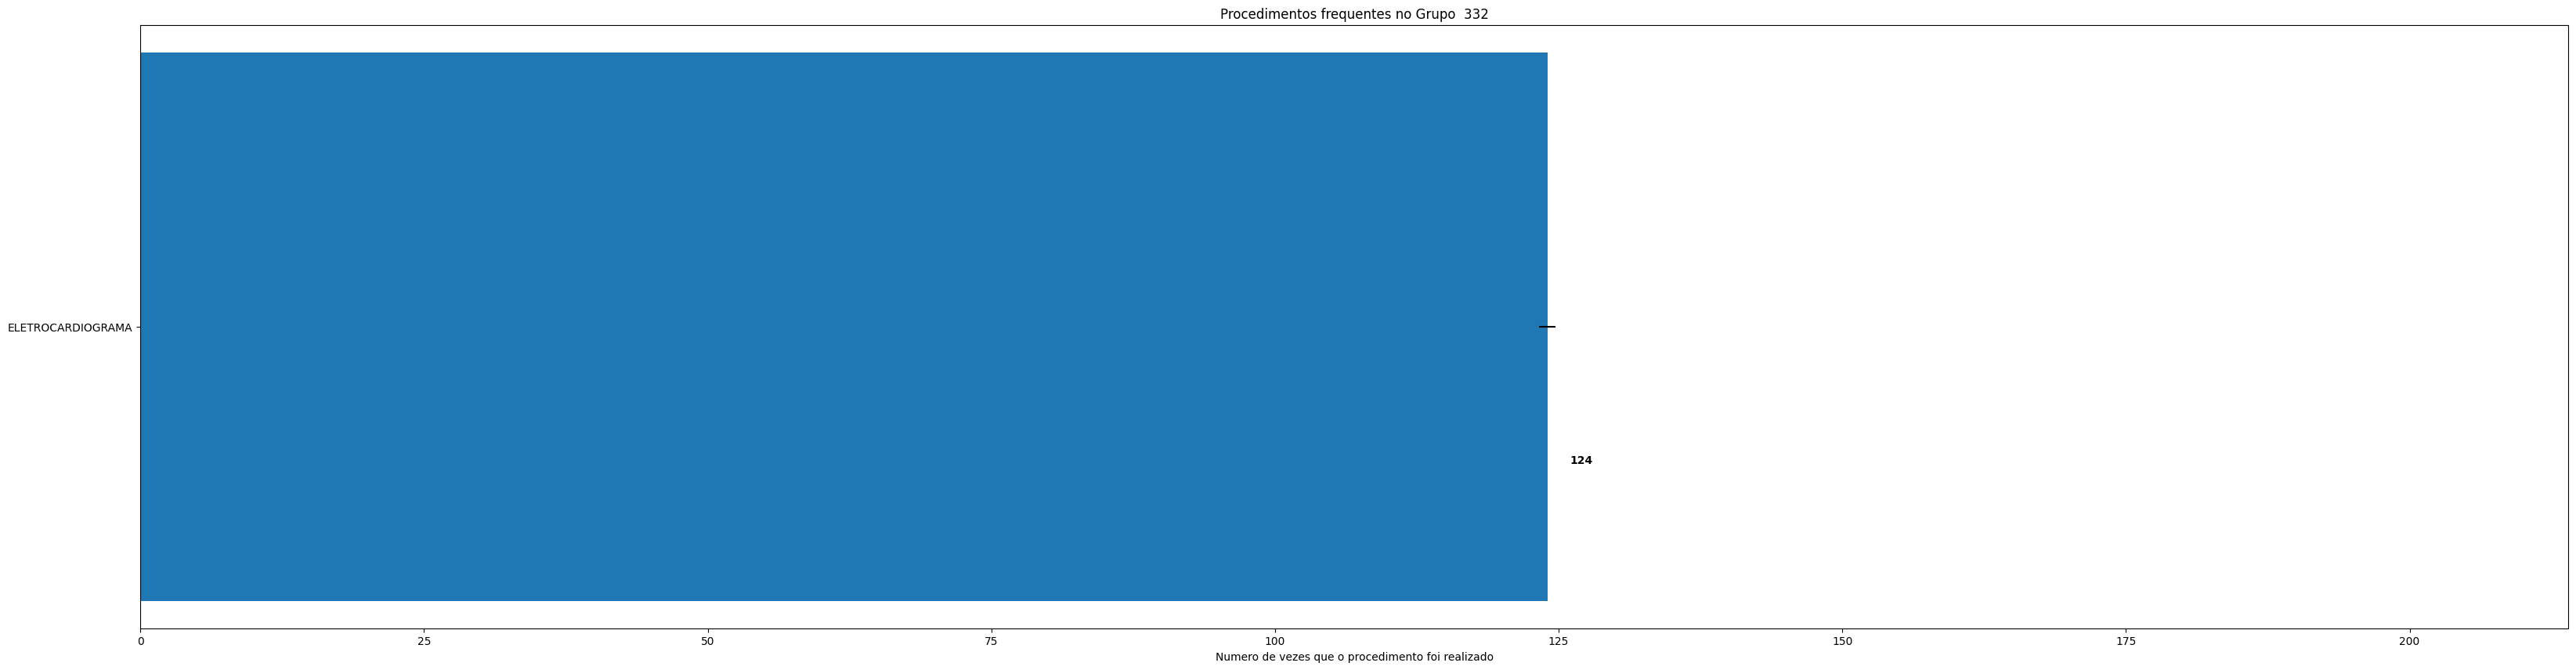

             visit_id         person_id  \
0    2980481236044025  7189220429975670   
1    4043715297113228  3848710987560534   
2      12250718316380  7189220429975670   
3    1682593870213569  5654724287080940   
4    1677007355919123  6263557121852079   
..                ...               ...   
218  8334593029578105  7770337484728964   
219  7425711422543273    86479553802255   
220  6772708710123599  4766160997425738   
221  2359358186221783  6668576841720943   
222  3051495714652459  4263044415023016   

                                       internacao_json  internacao_str  
0    {"person_id":7189220429975670,"visit_occurrenc...             NaN  
1    {"person_id":3848710987560534,"visit_occurrenc...             NaN  
2    {"person_id":7189220429975670,"visit_occurrenc...             NaN  
3    {"person_id":5654724287080940,"visit_occurrenc...             NaN  
4    {"person_id":6263557121852079,"visit_occurrenc...             NaN  
..                                           

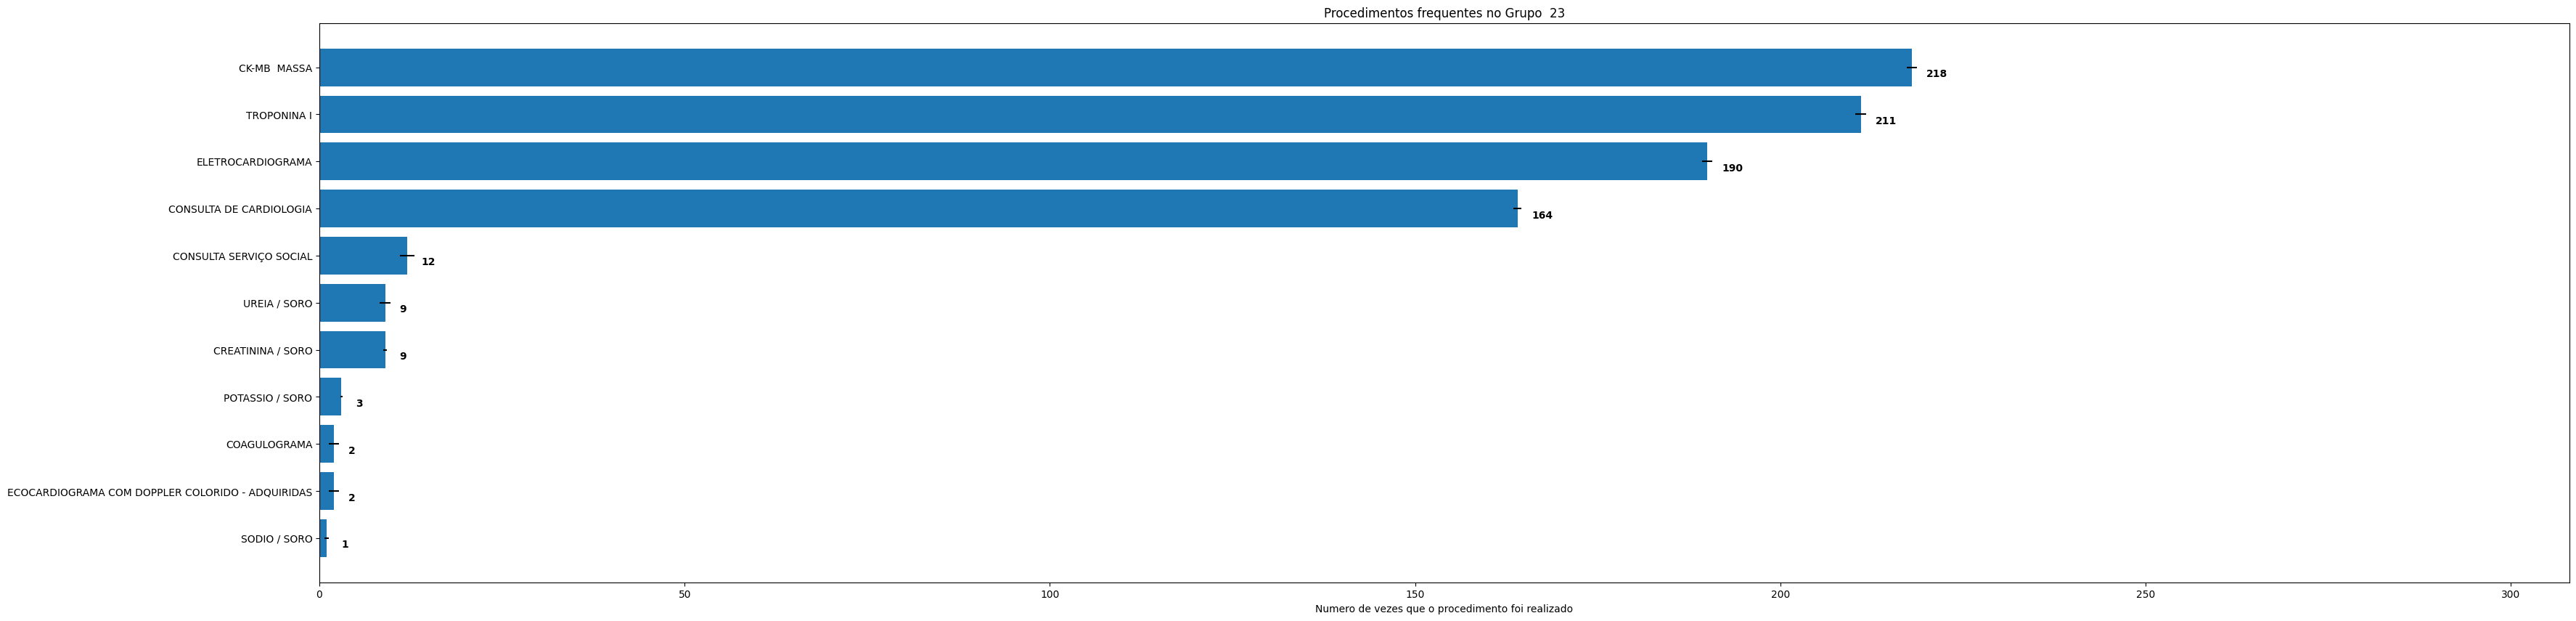

In [32]:
from pylab import *
#creating dataframes 
for i in range(0,5): #----------------------Escolha os 5 primeiros grupos mais frequentes ----------------#
    num_g = int (lista[i])
    #print(num_g)
    
    nome_df = "DfGrup "+str(lista[i])
    nome_df =  df_labels.query('Labels == @num_g')
    #print(nome_df)
    #print(lista[i])
    
    df = del_same_values_colum(nome_df, "ID")
    df = count_proce(df,df_json)
    #df = df['nome_pro'].astype(str)
    #total_rows['ColumnID'] = total_rows['ColumnID'].astype(str)
    #print(dtype(df))
    #figsize=(10,5)
    
    df=df.sort_values(by=['contagem'],ascending=False)
    df = df.head(25) #Parametro da quantidade que deve ser mostrada
    print(df)
    
    
    lista_pro =[]
  
    lista_pro = list(df['nome_pro'].values)
    labels = lista_pro
    
    lista_v = list(df['contagem'].values)
    
    
   
   
    #Teste com dic ordenado -------------------#
    
    D = dict(zip(lista_pro, lista_v))
    D =dict(sorted(D.items(), key=lambda x: x[1],reverse=True))
    #print(D)
    
    
    res = [(k, v) for k, v in D.items()]
    
    # Fixing random state for reproducibility
    np.random.seed(19680801)


    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(40,10))

    # Example data
    people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
    y_pos = np.arange(len(lista_pro))
    performance = lista_v
    error = np.random.rand(len(lista_pro))
    for i, v in enumerate(lista_v):
        text(v+2 , i + .2, str(v), fontweight = 'bold', fontsize = '10')
    xlim(0, max(lista_v)+90)
    
    ax.barh(y_pos, performance, xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(lista_pro)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Numero de vezes que o procedimento foi realizado')
    ax.set_title('Procedimentos frequentes no Grupo'+"  " +str(num_g) )
    name_pC = 'BAR Chart_Global Grupo  '+ str(num_g) +'.png' 
    plt.savefig('image_procedimentos/'+ name_pC,dpi=200) 
    plt.show()
   
 